# Machine Learning and Computer Vision
## Assigment 8

---

This assignment contains Tensorflow programming exercises.



## Problem 1: Install Tensorflow 
Follow the directions on https://www.tensorflow.org/install/ to install Tensorflow on your computer.

Note: You will not need GPU support for this assignment so don't worry if you don't have one. Furthermore, installing with GPU support is often more difficult to configure so it is suggested that you install the CPU only version. However, if you have a GPU and would like to install GPU support feel free to do so at your own risk :)

Note: On windows, Tensorflow is only supported in python3, so you will need to install python3 for this assignment.

Run the following cell to verify your instalation.

#### The output of sess.run() is array of numpy

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
message=tf.constant('I love LA')
with tf.Session() as sess:
    print(sess.run(message))


Instructions for updating:
non-resource variables are not supported in the long term
b'I love LA'


## Problem 2: Downloading CIFAR10
Download the CIFAR10 dataset (http://www.cs.toronto.edu/~kriz/cifar.html). You will need the python version: http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz 

Extract the data to ./data
Once extracted run the following cell to view a few example images.

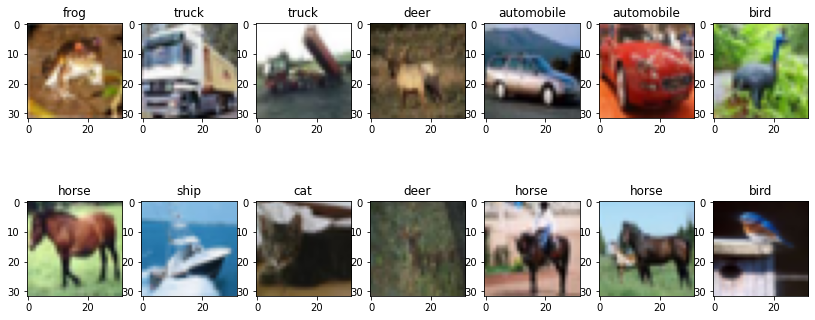

train shape: (50000, 32, 32, 3), (50000,)
test shape : (10000, 32, 32, 3), (10000,)


In [2]:
import numpy as np

# unpickles raw data files
def unpickle(file):
    import pickle
    import sys
    with open(file, 'rb') as fo:
        if sys.version_info[0] < 3:
            dict = pickle.load(fo)
        else:
            dict = pickle.load(fo, encoding='bytes') 
    return dict

# loads data from a single file
def getBatch(file):
    dict = unpickle(file)
    data = dict[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)#'-1'in reshape means this parameter is determined by other parameters
    labels = np.asarray(dict[b'labels'], dtype=np.int64)#np.asarray change dict to np.array 
    return data,labels

# loads all training and testing data
def getData(path='./data'):#the CIFAR file 10 is from "data" folder
    classes = [s.decode('UTF-8') for s in unpickle(path+'/batches.meta')[b'label_names']]
    #classes means categories,kinds
    trainData, trainLabels = [], []
    for i in range(5):
        data, labels = getBatch(path+'/data_batch_%d'%(i+1))
        trainData.append(data)
        trainLabels.append(labels)
    trainData = np.concatenate(trainData)#np.concatenate is like append,but this function can add a sequence instead of an element
    trainLabels = np.concatenate(trainLabels)#but the porpose here is to change list to np.array
    
    testData, testLabels = getBatch(path+'/test_batch')
    return classes, trainData, trainLabels, testData, testLabels

# training and testing data that will be used in the following problems
classes, trainData, trainLabels, testData, testLabels = getData()

# display some example images
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 6))
for i in range(14):
    plt.subplot(2,7,i+1)
    plt.imshow(trainData[i])#this slice is equal to trainData[i,:,:,:]
    plt.title(classes[trainLabels[i]])
plt.show()

print ('train shape: ' +str(trainData.shape) + ', ' + str(trainLabels.shape))
print ('test shape : ' + str(testData.shape) + ', ' + str(testLabels.shape))
#testData is different from trainData,because they're from different file in path of './data'
#testLabels range from [0,9]

Below are some helper functions that will be used in the following problems.

In [24]:
Nclass=len(classes)
def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))

In [25]:
# a generator for batches of data
# yields data (batchsize, 3, 32, 32) and labels (batchsize)
# if shuffle, it will load batches in a random order
def DataBatch(data, label, batchsize, shuffle=True):#label stores titles for every images;  batchsize means how many batches in total.
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]#yield is like return,but it makes a generator
    #print(data[inds].shape)
    #output shape of data in every iteration is(50,32,32,3); shape of output label is (50,)

# tests the accuracy of a classifier
def test(testData, testLabels, classifier):
    batchsize=10000
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize):#the output of DataBatch is a generator
        prediction = classifier(data)#50 random numbers range from [0,10)
        #print (prediction)
        correct += np.sum(prediction==label)#!!!how many elements are equal
        IoU(label,prediction)
    return correct/testData.shape[0]*100

# a sample classifier
# given an input it outputs a random class
class RandomClassifier():
    def __init__(self, classes=10):
        self.classes=classes
    def __call__(self, x):
        return np.random.randint(self.classes, size=x.shape[0])

randomClassifier = RandomClassifier()
print ('Random classifier accuracy: %f'%test(testData, testLabels, randomClassifier))

class 00: #TP=   103, #FP=   928, #FN=  897, IoU=0.053
class 01: #TP=   102, #FP=   868, #FN=  898, IoU=0.055
class 02: #TP=   111, #FP=   941, #FN=  889, IoU=0.057
class 03: #TP=   131, #FP=   892, #FN=  869, IoU=0.069
class 04: #TP=    86, #FP=   883, #FN=  914, IoU=0.046
class 05: #TP=    97, #FP=   879, #FN=  903, IoU=0.052
class 06: #TP=   102, #FP=   876, #FN=  898, IoU=0.054
class 07: #TP=   115, #FP=   839, #FN=  885, IoU=0.063
class 08: #TP=   103, #FP=   940, #FN=  897, IoU=0.053
class 09: #TP=    87, #FP=   917, #FN=  913, IoU=0.045
_________________
Mean IoU: 0.055
Random classifier accuracy: 10.370000


## Problem 3: Confusion Matirx
Here you will implement a test script that computes the confussion matrix for a classifier.
The matrix should be nxn where n is the number of classes.
Entry M[i,j] should contain the number of times an image of class i was classified as class j.
M should be normalized such that each row sums to 1.

Hint: see the function test() above for reference.

note: confusion matrix represents the rate that x axis is classified into y axis

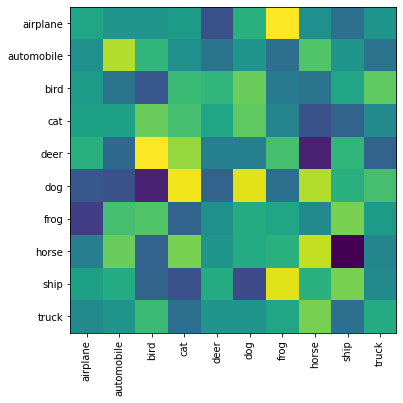

In [26]:
def confusion(testData, testLabels, classifier):
    batchsize=10000
    correct=0.
    M=np.zeros([10,10])
    for data,label in DataBatch(testData,testLabels,batchsize):#this sentence makes use of generator.
        prediction = classifier(data)
        label_list=label.tolist()#the len of it is 50
        prediction_list=prediction.tolist()
        for i in range(batchsize):
            M[label_list[i],prediction_list[i]]+=1
       
    for i in range(M.shape[0]): #normalization
        M[i,:]=M[i,:]/np.sum(M[i,:])
    return M

def VisualizeConfussion(M):
    plt.figure(figsize=(14, 6))
    plt.imshow(M)#, vmin=0, vmax=1)
    plt.xticks(np.arange(len(classes)), classes, rotation='vertical')
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()

M = confusion(testData, testLabels, randomClassifier)
VisualizeConfussion(M)

## Deep learning
Below is some helper code to train your deep networks

Hint: see https://www.tensorflow.org/get_started/mnist/pros or https://www.tensorflow.org/get_started/mnist/beginners for reference


class 00: #TP=    35, #FP=    55, #FN=  965, IoU=0.033
class 01: #TP=   251, #FP=   506, #FN=  749, IoU=0.167
class 02: #TP=     4, #FP=    14, #FN=  996, IoU=0.004
class 03: #TP=    49, #FP=   149, #FN=  951, IoU=0.043
class 04: #TP=   225, #FP=   702, #FN=  775, IoU=0.132
class 05: #TP=   350, #FP=  1385, #FN=  650, IoU=0.147
class 06: #TP=    36, #FP=    25, #FN=  964, IoU=0.035
class 07: #TP=   495, #FP=  1698, #FN=  505, IoU=0.183
class 08: #TP=    99, #FP=   153, #FN=  901, IoU=0.086
class 09: #TP=   711, #FP=  3058, #FN=  289, IoU=0.175
_________________
Mean IoU: 0.101
testing epoch:1 accuracy: 22.550000

class 00: #TP=   142, #FP=   258, #FN=  858, IoU=0.113
class 01: #TP=   506, #FP=  1606, #FN=  494, IoU=0.194
class 02: #TP=   504, #FP=  2485, #FN=  496, IoU=0.145
class 03: #TP=     2, #FP=     5, #FN=  998, IoU=0.002
class 04: #TP=    99, #FP=   311, #FN=  901, IoU=0.076
class 05: #TP=   117, #FP=   270, #FN=  883, IoU=0.092
class 06: #TP=   227, #FP=   361, #FN=  773, IoU=

class 00: #TP=   124, #FP=   217, #FN=  876, IoU=0.102
class 01: #TP=   229, #FP=   172, #FN=  771, IoU=0.195
class 02: #TP=     6, #FP=    12, #FN=  994, IoU=0.006
class 03: #TP=   905, #FP=  6168, #FN=   95, IoU=0.126
class 04: #TP=    34, #FP=    59, #FN=  966, IoU=0.032
class 05: #TP=     1, #FP=     9, #FN=  999, IoU=0.001
class 06: #TP=   119, #FP=   140, #FN=  881, IoU=0.104
class 07: #TP=   235, #FP=   253, #FN=  765, IoU=0.188
class 08: #TP=   403, #FP=   625, #FN=  597, IoU=0.248
class 09: #TP=   151, #FP=   138, #FN=  849, IoU=0.133
_________________
Mean IoU: 0.114
testing epoch:15 accuracy: 22.070000

class 00: #TP=   211, #FP=   707, #FN=  789, IoU=0.124
class 01: #TP=    91, #FP=    49, #FN=  909, IoU=0.087
class 02: #TP=   361, #FP=  1232, #FN=  639, IoU=0.162
class 03: #TP=    19, #FP=    19, #FN=  981, IoU=0.019
class 04: #TP=     6, #FP=    18, #FN=  994, IoU=0.006
class 05: #TP=    37, #FP=    79, #FN=  963, IoU=0.034
class 06: #TP=   331, #FP=   512, #FN=  669, IoU

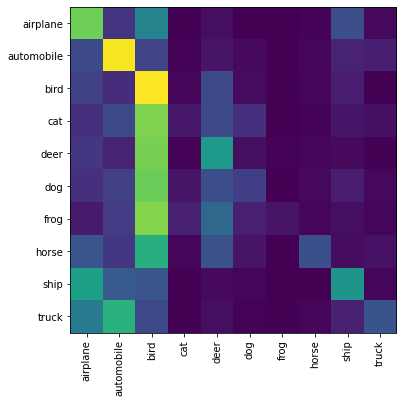

In [33]:
# base class for your Tensorflow networks. It implements the training loop (train) and prediction(__call__)  for you.
# You will need to implement the __init__ function to define the networks structures in the following problems
class TFClassifier():
    def __init__(self):#initialize function. If I implement class, the init will implement as well. 
        pass#pass is a blank sentense which is non-sense
    
    def train(self, trainData, trainLabels, epochs=1, batchsize=32):
        self.prediction = tf.argmax(self.y,1)#get the max index of self.y; 1 means reserving the shape of column!!!; It's shape is (50,)
        self.cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=self.y_, logits=self.y))
        #get mean value 
        #1st step,normalize self.y. Self.y represents the rate that each image is classified in each class. 
        #2nd step. output=-labels*ln(normalized self.y).     
        #every row of normalized self.y (prediction of neural network of each image whose shape(1,10)) calculates with every element of label.
        #for each image, its real label caululate with its logit(feature map)
        #Note: logits -> normalized logits ; label->  type of one-hot
        #tf.nn.sparse...'s shape is (50,); output of tf.reduce_mean is just one value
        self.train_step = tf.train.AdamOptimizer(1e-4).minimize(self.cross_entropy)#1e-4 means 10^(-4)
        #It is a super super complicated algorithm that returns to updated variables in var_list,
        # which means it changes weight_variable andbias_variable
        #self.cross_entropy is the "loss" to minimize
        self.correct_prediction = tf.equal(self.prediction, self.y_)# elementwise compare self.predicion and self.y_.return [True,False......]
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))#tf.cast funcion converts dtype. True->1,False->0
        
        self.sess.run(tf.global_variables_initializer())#initialize global variables
        
        for epoch in range(epochs):#range from [0,20)
            for i, (data,label) in enumerate(DataBatch(trainData, trainLabels, batchsize, shuffle=True)):#1000 batches in total
                #i is number which starts from 0.
                _, acc = self.sess.run([self.train_step, self.accuracy], feed_dict={self.x: data, self.y_: label})
                # feed_dict function replaces some parameters. In this sentence, they're self.x and self.y 
               
                #if i%100==99:
                #    print ('%d/%d %d %f'%(epoch, epochs, i, acc,))
                    
            print ('testing epoch:%d accuracy: %f\n'%(epoch+1, test(testData, testLabels, self)))

        
        
        
    def __call__(self, x):
        return self.sess.run(self.prediction, feed_dict={self.x: x})

# helper function to get weight variable
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)#create a Normal Distribution and |every elements-mean|<2*standard deviation
    return tf.Variable(initial)

# helper function to get bias variable
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# example linear classifier
class LinearClassifer(TFClassifier):
    def __init__(self, classes=10):
        self.sess = tf.Session()

        self.x = tf.placeholder(tf.float32, shape=[None,32,32,3]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels

        # model variables
        self.W = weight_variable([32*32*3,classes]) #column represents a image; row represents class. Normal Distribution
        self.b = bias_variable([classes])#whose shape is (10,);it is[0.1, 0.1, 0.1......]

        # linear operation
        self.y = tf.matmul(tf.reshape(self.x,(-1,32*32*3)),self.W) + self.b#-1 means that arg is decided by other args.
        #every row of tf.matmul()' output gonna add self.b. I think that means  adding 0.1 to every elements.
        # 'maltul' is matrix multiply, which is different from elementwise multiply(tf.multiply())
        #output shape is [50,classes]
        
# test the example linear classifier (note you should get around 20-30% accuracy)
linearClassifer = LinearClassifer()
linearClassifer.train(trainData, trainLabels, epochs=20)#value 20 replaces 1, which means doing 20 iterations.

# display confusion matrix
M = confusion(testData, testLabels, linearClassifer)#attention: we use trainData to train and use testData to test our classifier.
VisualizeConfussion(M)

## Problem 4: Convolutional Neural Netork (CNN)

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n) )

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n*2) )

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n*4) )

Linear(output_features=classes)

class 00: #TP=   651, #FP=   816, #FN=  349, IoU=0.358
class 01: #TP=   608, #FP=   361, #FN=  392, IoU=0.447
class 02: #TP=   174, #FP=   192, #FN=  826, IoU=0.146
class 03: #TP=   445, #FP=   932, #FN=  555, IoU=0.230
class 04: #TP=   321, #FP=   391, #FN=  679, IoU=0.231
class 05: #TP=   444, #FP=   756, #FN=  556, IoU=0.253
class 06: #TP=   426, #FP=   305, #FN=  574, IoU=0.326
class 07: #TP=   600, #FP=   683, #FN=  400, IoU=0.357
class 08: #TP=   488, #FP=   364, #FN=  512, IoU=0.358
class 09: #TP=   548, #FP=   495, #FN=  452, IoU=0.367
_________________
Mean IoU: 0.307
testing epoch:1 accuracy: 47.050000

class 00: #TP=   551, #FP=   416, #FN=  449, IoU=0.389
class 01: #TP=   668, #FP=   348, #FN=  332, IoU=0.496
class 02: #TP=   303, #FP=   303, #FN=  697, IoU=0.233
class 03: #TP=   254, #FP=   387, #FN=  746, IoU=0.183
class 04: #TP=   363, #FP=   435, #FN=  637, IoU=0.253
class 05: #TP=   545, #FP=   837, #FN=  455, IoU=0.297
class 06: #TP=   658, #FP=   629, #FN=  342, IoU=

class 00: #TP=   616, #FP=   178, #FN=  384, IoU=0.523
class 01: #TP=   750, #FP=   212, #FN=  250, IoU=0.619
class 02: #TP=   441, #FP=   272, #FN=  559, IoU=0.347
class 03: #TP=   428, #FP=   448, #FN=  572, IoU=0.296
class 04: #TP=   551, #FP=   395, #FN=  449, IoU=0.395
class 05: #TP=   574, #FP=   460, #FN=  426, IoU=0.393
class 06: #TP=   848, #FP=   639, #FN=  152, IoU=0.517
class 07: #TP=   740, #FP=   326, #FN=  260, IoU=0.558
class 08: #TP=   798, #FP=   256, #FN=  202, IoU=0.635
class 09: #TP=   730, #FP=   338, #FN=  270, IoU=0.546
_________________
Mean IoU: 0.483
testing epoch:15 accuracy: 64.760000

class 00: #TP=   670, #FP=   280, #FN=  330, IoU=0.523
class 01: #TP=   751, #FP=   217, #FN=  249, IoU=0.617
class 02: #TP=   432, #FP=   275, #FN=  568, IoU=0.339
class 03: #TP=   511, #FP=   616, #FN=  489, IoU=0.316
class 04: #TP=   646, #FP=   620, #FN=  354, IoU=0.399
class 05: #TP=   510, #FP=   364, #FN=  490, IoU=0.374
class 06: #TP=   706, #FP=   279, #FN=  294, IoU

class 00: #TP=   746, #FP=   444, #FN=  254, IoU=0.517
class 01: #TP=   761, #FP=   240, #FN=  239, IoU=0.614
class 02: #TP=   415, #FP=   245, #FN=  585, IoU=0.333
class 03: #TP=   382, #FP=   361, #FN=  618, IoU=0.281
class 04: #TP=   600, #FP=   483, #FN=  400, IoU=0.405
class 05: #TP=   590, #FP=   545, #FN=  410, IoU=0.382
class 06: #TP=   688, #FP=   282, #FN=  312, IoU=0.537
class 07: #TP=   750, #FP=   423, #FN=  250, IoU=0.527
class 08: #TP=   738, #FP=   206, #FN=  262, IoU=0.612
class 09: #TP=   744, #FP=   357, #FN=  256, IoU=0.548
_________________
Mean IoU: 0.475
testing epoch:29 accuracy: 64.140000

class 00: #TP=   628, #FP=   196, #FN=  372, IoU=0.525
class 01: #TP=   688, #FP=   146, #FN=  312, IoU=0.600
class 02: #TP=   426, #FP=   274, #FN=  574, IoU=0.334
class 03: #TP=   424, #FP=   455, #FN=  576, IoU=0.291
class 04: #TP=   639, #FP=   657, #FN=  361, IoU=0.386
class 05: #TP=   531, #FP=   415, #FN=  469, IoU=0.375
class 06: #TP=   812, #FP=   610, #FN=  188, IoU

class 00: #TP=   727, #FP=   383, #FN=  273, IoU=0.526
class 01: #TP=   728, #FP=   216, #FN=  272, IoU=0.599
class 02: #TP=   487, #FP=   390, #FN=  513, IoU=0.350
class 03: #TP=   432, #FP=   537, #FN=  568, IoU=0.281
class 04: #TP=   540, #FP=   417, #FN=  460, IoU=0.381
class 05: #TP=   596, #FP=   610, #FN=  404, IoU=0.370
class 06: #TP=   671, #FP=   278, #FN=  329, IoU=0.525
class 07: #TP=   722, #FP=   383, #FN=  278, IoU=0.522
class 08: #TP=   683, #FP=   152, #FN=  317, IoU=0.593
class 09: #TP=   715, #FP=   333, #FN=  285, IoU=0.536
_________________
Mean IoU: 0.468
testing epoch:43 accuracy: 63.010000

class 00: #TP=   691, #FP=   327, #FN=  309, IoU=0.521
class 01: #TP=   689, #FP=   154, #FN=  311, IoU=0.597
class 02: #TP=   534, #FP=   503, #FN=  466, IoU=0.355
class 03: #TP=   441, #FP=   519, #FN=  559, IoU=0.290
class 04: #TP=   539, #FP=   344, #FN=  461, IoU=0.401
class 05: #TP=   560, #FP=   513, #FN=  440, IoU=0.370
class 06: #TP=   707, #FP=   342, #FN=  293, IoU

class 00: #TP=   706, #FP=   375, #FN=  294, IoU=0.513
class 01: #TP=   742, #FP=   233, #FN=  258, IoU=0.602
class 02: #TP=   498, #FP=   425, #FN=  502, IoU=0.349
class 03: #TP=   460, #FP=   690, #FN=  540, IoU=0.272
class 04: #TP=   495, #FP=   367, #FN=  505, IoU=0.362
class 05: #TP=   620, #FP=   693, #FN=  380, IoU=0.366
class 06: #TP=   568, #FP=   178, #FN=  432, IoU=0.482
class 07: #TP=   662, #FP=   313, #FN=  338, IoU=0.504
class 08: #TP=   736, #FP=   197, #FN=  264, IoU=0.615
class 09: #TP=   706, #FP=   336, #FN=  294, IoU=0.528
_________________
Mean IoU: 0.459
testing epoch:57 accuracy: 61.930000

class 00: #TP=   691, #FP=   331, #FN=  309, IoU=0.519
class 01: #TP=   729, #FP=   221, #FN=  271, IoU=0.597
class 02: #TP=   490, #FP=   432, #FN=  510, IoU=0.342
class 03: #TP=   457, #FP=   602, #FN=  543, IoU=0.285
class 04: #TP=   594, #FP=   500, #FN=  406, IoU=0.396
class 05: #TP=   518, #FP=   459, #FN=  482, IoU=0.355
class 06: #TP=   716, #FP=   392, #FN=  284, IoU

class 00: #TP=   721, #FP=   441, #FN=  279, IoU=0.500
class 01: #TP=   725, #FP=   247, #FN=  275, IoU=0.581
class 02: #TP=   523, #FP=   544, #FN=  477, IoU=0.339
class 03: #TP=   401, #FP=   527, #FN=  599, IoU=0.263
class 04: #TP=   514, #FP=   391, #FN=  486, IoU=0.370
class 05: #TP=   538, #FP=   561, #FN=  462, IoU=0.345
class 06: #TP=   708, #FP=   394, #FN=  292, IoU=0.508
class 07: #TP=   659, #FP=   325, #FN=  341, IoU=0.497
class 08: #TP=   707, #FP=   200, #FN=  293, IoU=0.589
class 09: #TP=   641, #FP=   233, #FN=  359, IoU=0.520
_________________
Mean IoU: 0.451
testing epoch:71 accuracy: 61.370000

class 00: #TP=   643, #FP=   338, #FN=  357, IoU=0.481
class 01: #TP=   717, #FP=   238, #FN=  283, IoU=0.579
class 02: #TP=   531, #FP=   525, #FN=  469, IoU=0.348
class 03: #TP=   485, #FP=   722, #FN=  515, IoU=0.282
class 04: #TP=   517, #FP=   382, #FN=  483, IoU=0.374
class 05: #TP=   523, #FP=   521, #FN=  477, IoU=0.344
class 06: #TP=   676, #FP=   339, #FN=  324, IoU

class 00: #TP=   633, #FP=   360, #FN=  367, IoU=0.465
class 01: #TP=   724, #FP=   266, #FN=  276, IoU=0.572
class 02: #TP=   461, #FP=   425, #FN=  539, IoU=0.324
class 03: #TP=   490, #FP=   711, #FN=  510, IoU=0.286
class 04: #TP=   521, #FP=   430, #FN=  479, IoU=0.364
class 05: #TP=   480, #FP=   458, #FN=  520, IoU=0.329
class 06: #TP=   699, #FP=   385, #FN=  301, IoU=0.505
class 07: #TP=   660, #FP=   329, #FN=  340, IoU=0.497
class 08: #TP=   753, #FP=   295, #FN=  247, IoU=0.581
class 09: #TP=   649, #FP=   271, #FN=  351, IoU=0.511
_________________
Mean IoU: 0.443
testing epoch:85 accuracy: 60.700000

class 00: #TP=   661, #FP=   392, #FN=  339, IoU=0.475
class 01: #TP=   737, #FP=   282, #FN=  263, IoU=0.575
class 02: #TP=   472, #FP=   473, #FN=  528, IoU=0.320
class 03: #TP=   413, #FP=   589, #FN=  587, IoU=0.260
class 04: #TP=   570, #FP=   545, #FN=  430, IoU=0.369
class 05: #TP=   530, #FP=   546, #FN=  470, IoU=0.343
class 06: #TP=   620, #FP=   237, #FN=  380, IoU

class 00: #TP=   645, #FP=   347, #FN=  355, IoU=0.479
class 01: #TP=   750, #FP=   299, #FN=  250, IoU=0.577
class 02: #TP=   481, #FP=   508, #FN=  519, IoU=0.319
class 03: #TP=   405, #FP=   557, #FN=  595, IoU=0.260
class 04: #TP=   571, #FP=   524, #FN=  429, IoU=0.375
class 05: #TP=   479, #FP=   438, #FN=  521, IoU=0.333
class 06: #TP=   668, #FP=   324, #FN=  332, IoU=0.505
class 07: #TP=   669, #FP=   365, #FN=  331, IoU=0.490
class 08: #TP=   720, #FP=   245, #FN=  280, IoU=0.578
class 09: #TP=   676, #FP=   329, #FN=  324, IoU=0.509
_________________
Mean IoU: 0.442
testing epoch:99 accuracy: 60.640000

class 00: #TP=   591, #FP=   321, #FN=  409, IoU=0.447
class 01: #TP=   693, #FP=   234, #FN=  307, IoU=0.562
class 02: #TP=   499, #FP=   552, #FN=  501, IoU=0.322
class 03: #TP=   403, #FP=   559, #FN=  597, IoU=0.258
class 04: #TP=   572, #FP=   495, #FN=  428, IoU=0.383
class 05: #TP=   450, #FP=   426, #FN=  550, IoU=0.316
class 06: #TP=   688, #FP=   371, #FN=  312, IoU

class 00: #TP=   645, #FP=   326, #FN=  355, IoU=0.486
class 01: #TP=   724, #FP=   258, #FN=  276, IoU=0.576
class 02: #TP=   459, #FP=   423, #FN=  541, IoU=0.323
class 03: #TP=   448, #FP=   658, #FN=  552, IoU=0.270
class 04: #TP=   579, #FP=   527, #FN=  421, IoU=0.379
class 05: #TP=   508, #FP=   500, #FN=  492, IoU=0.339
class 06: #TP=   676, #FP=   330, #FN=  324, IoU=0.508
class 07: #TP=   654, #FP=   318, #FN=  346, IoU=0.496
class 08: #TP=   718, #FP=   223, #FN=  282, IoU=0.587
class 09: #TP=   694, #FP=   332, #FN=  306, IoU=0.521
_________________
Mean IoU: 0.449
testing epoch:113 accuracy: 61.050000

class 00: #TP=   698, #FP=   423, #FN=  302, IoU=0.491
class 01: #TP=   692, #FP=   218, #FN=  308, IoU=0.568
class 02: #TP=   477, #FP=   485, #FN=  523, IoU=0.321
class 03: #TP=   421, #FP=   624, #FN=  579, IoU=0.259
class 04: #TP=   565, #FP=   546, #FN=  435, IoU=0.365
class 05: #TP=   494, #FP=   479, #FN=  506, IoU=0.334
class 06: #TP=   643, #FP=   281, #FN=  357, Io

class 00: #TP=   640, #FP=   355, #FN=  360, IoU=0.472
class 01: #TP=   738, #FP=   267, #FN=  262, IoU=0.582
class 02: #TP=   502, #FP=   555, #FN=  498, IoU=0.323
class 03: #TP=   449, #FP=   657, #FN=  551, IoU=0.271
class 04: #TP=   557, #FP=   510, #FN=  443, IoU=0.369
class 05: #TP=   498, #FP=   467, #FN=  502, IoU=0.339
class 06: #TP=   671, #FP=   322, #FN=  329, IoU=0.508
class 07: #TP=   653, #FP=   337, #FN=  347, IoU=0.488
class 08: #TP=   710, #FP=   231, #FN=  290, IoU=0.577
class 09: #TP=   630, #FP=   251, #FN=  370, IoU=0.504
_________________
Mean IoU: 0.443
testing epoch:127 accuracy: 60.480000

class 00: #TP=   675, #FP=   427, #FN=  325, IoU=0.473
class 01: #TP=   737, #FP=   289, #FN=  263, IoU=0.572
class 02: #TP=   440, #FP=   384, #FN=  560, IoU=0.318
class 03: #TP=   440, #FP=   651, #FN=  560, IoU=0.267
class 04: #TP=   537, #FP=   450, #FN=  463, IoU=0.370
class 05: #TP=   528, #FP=   568, #FN=  472, IoU=0.337
class 06: #TP=   686, #FP=   338, #FN=  314, Io

class 00: #TP=   665, #FP=   351, #FN=  335, IoU=0.492
class 01: #TP=   735, #FP=   285, #FN=  265, IoU=0.572
class 02: #TP=   424, #FP=   335, #FN=  576, IoU=0.318
class 03: #TP=   377, #FP=   513, #FN=  623, IoU=0.249
class 04: #TP=   586, #FP=   555, #FN=  414, IoU=0.377
class 05: #TP=   520, #FP=   549, #FN=  480, IoU=0.336
class 06: #TP=   658, #FP=   287, #FN=  342, IoU=0.511
class 07: #TP=   688, #FP=   411, #FN=  312, IoU=0.488
class 08: #TP=   742, #FP=   287, #FN=  258, IoU=0.577
class 09: #TP=   684, #FP=   348, #FN=  316, IoU=0.507
_________________
Mean IoU: 0.443
testing epoch:141 accuracy: 60.790000

class 00: #TP=   690, #FP=   437, #FN=  310, IoU=0.480
class 01: #TP=   738, #FP=   281, #FN=  262, IoU=0.576
class 02: #TP=   443, #FP=   408, #FN=  557, IoU=0.315
class 03: #TP=   380, #FP=   504, #FN=  620, IoU=0.253
class 04: #TP=   567, #FP=   534, #FN=  433, IoU=0.370
class 05: #TP=   544, #FP=   523, #FN=  456, IoU=0.357
class 06: #TP=   674, #FP=   350, #FN=  326, Io

class 00: #TP=   633, #FP=   334, #FN=  367, IoU=0.475
class 01: #TP=   717, #FP=   278, #FN=  283, IoU=0.561
class 02: #TP=   460, #FP=   492, #FN=  540, IoU=0.308
class 03: #TP=   380, #FP=   518, #FN=  620, IoU=0.250
class 04: #TP=   556, #FP=   520, #FN=  444, IoU=0.366
class 05: #TP=   470, #FP=   438, #FN=  530, IoU=0.327
class 06: #TP=   620, #FP=   270, #FN=  380, IoU=0.488
class 07: #TP=   732, #FP=   572, #FN=  268, IoU=0.466
class 08: #TP=   720, #FP=   255, #FN=  280, IoU=0.574
class 09: #TP=   673, #FP=   362, #FN=  327, IoU=0.494
_________________
Mean IoU: 0.431
testing epoch:155 accuracy: 59.610000

class 00: #TP=   670, #FP=   377, #FN=  330, IoU=0.487
class 01: #TP=   722, #FP=   255, #FN=  278, IoU=0.575
class 02: #TP=   428, #FP=   388, #FN=  572, IoU=0.308
class 03: #TP=   436, #FP=   672, #FN=  564, IoU=0.261
class 04: #TP=   540, #FP=   460, #FN=  460, IoU=0.370
class 05: #TP=   523, #FP=   562, #FN=  477, IoU=0.335
class 06: #TP=   635, #FP=   299, #FN=  365, Io

class 00: #TP=   657, #FP=   405, #FN=  343, IoU=0.468
class 01: #TP=   726, #FP=   256, #FN=  274, IoU=0.578
class 02: #TP=   464, #FP=   483, #FN=  536, IoU=0.313
class 03: #TP=   428, #FP=   631, #FN=  572, IoU=0.262
class 04: #TP=   522, #FP=   466, #FN=  478, IoU=0.356
class 05: #TP=   487, #FP=   516, #FN=  513, IoU=0.321
class 06: #TP=   648, #FP=   319, #FN=  352, IoU=0.491
class 07: #TP=   670, #FP=   362, #FN=  330, IoU=0.492
class 08: #TP=   736, #FP=   291, #FN=  264, IoU=0.570
class 09: #TP=   656, #FP=   277, #FN=  344, IoU=0.514
_________________
Mean IoU: 0.437
testing epoch:169 accuracy: 59.940000

class 00: #TP=   579, #FP=   270, #FN=  421, IoU=0.456
class 01: #TP=   636, #FP=   156, #FN=  364, IoU=0.550
class 02: #TP=   461, #FP=   490, #FN=  539, IoU=0.309
class 03: #TP=   420, #FP=   615, #FN=  580, IoU=0.260
class 04: #TP=   564, #FP=   536, #FN=  436, IoU=0.367
class 05: #TP=   538, #FP=   571, #FN=  462, IoU=0.342
class 06: #TP=   692, #FP=   360, #FN=  308, Io

class 00: #TP=   627, #FP=   289, #FN=  373, IoU=0.486
class 01: #TP=   756, #FP=   282, #FN=  244, IoU=0.590
class 02: #TP=   469, #FP=   500, #FN=  531, IoU=0.313
class 03: #TP=   465, #FP=   682, #FN=  535, IoU=0.276
class 04: #TP=   549, #FP=   534, #FN=  451, IoU=0.358
class 05: #TP=   465, #FP=   441, #FN=  535, IoU=0.323
class 06: #TP=   673, #FP=   353, #FN=  327, IoU=0.497
class 07: #TP=   646, #FP=   318, #FN=  354, IoU=0.490
class 08: #TP=   737, #FP=   282, #FN=  263, IoU=0.575
class 09: #TP=   650, #FP=   282, #FN=  350, IoU=0.507
_________________
Mean IoU: 0.442
testing epoch:183 accuracy: 60.370000

class 00: #TP=   635, #FP=   350, #FN=  365, IoU=0.470
class 01: #TP=   711, #FP=   253, #FN=  289, IoU=0.567
class 02: #TP=   502, #FP=   596, #FN=  498, IoU=0.315
class 03: #TP=   398, #FP=   564, #FN=  602, IoU=0.254
class 04: #TP=   540, #FP=   479, #FN=  460, IoU=0.365
class 05: #TP=   508, #FP=   514, #FN=  492, IoU=0.336
class 06: #TP=   612, #FP=   250, #FN=  388, Io

class 00: #TP=   619, #FP=   299, #FN=  381, IoU=0.477
class 01: #TP=   710, #FP=   268, #FN=  290, IoU=0.560
class 02: #TP=   452, #FP=   470, #FN=  548, IoU=0.307
class 03: #TP=   404, #FP=   534, #FN=  596, IoU=0.263
class 04: #TP=   571, #FP=   554, #FN=  429, IoU=0.367
class 05: #TP=   514, #FP=   516, #FN=  486, IoU=0.339
class 06: #TP=   626, #FP=   237, #FN=  374, IoU=0.506
class 07: #TP=   679, #FP=   368, #FN=  321, IoU=0.496
class 08: #TP=   790, #FP=   406, #FN=  210, IoU=0.562
class 09: #TP=   659, #FP=   324, #FN=  341, IoU=0.498
_________________
Mean IoU: 0.438
testing epoch:197 accuracy: 60.240000

class 00: #TP=   690, #FP=   486, #FN=  310, IoU=0.464
class 01: #TP=   713, #FP=   274, #FN=  287, IoU=0.560
class 02: #TP=   408, #FP=   364, #FN=  592, IoU=0.299
class 03: #TP=   440, #FP=   636, #FN=  560, IoU=0.269
class 04: #TP=   549, #FP=   477, #FN=  451, IoU=0.372
class 05: #TP=   503, #FP=   442, #FN=  497, IoU=0.349
class 06: #TP=   671, #FP=   313, #FN=  329, Io

class 00: #TP=   643, #FP=   378, #FN=  357, IoU=0.467
class 01: #TP=   710, #FP=   255, #FN=  290, IoU=0.566
class 02: #TP=   487, #FP=   559, #FN=  513, IoU=0.312
class 03: #TP=   409, #FP=   612, #FN=  591, IoU=0.254
class 04: #TP=   566, #FP=   543, #FN=  434, IoU=0.367
class 05: #TP=   518, #FP=   544, #FN=  482, IoU=0.335
class 06: #TP=   592, #FP=   227, #FN=  408, IoU=0.482
class 07: #TP=   633, #FP=   324, #FN=  367, IoU=0.478
class 08: #TP=   741, #FP=   301, #FN=  259, IoU=0.570
class 09: #TP=   645, #FP=   313, #FN=  355, IoU=0.491
_________________
Mean IoU: 0.432
testing epoch:211 accuracy: 59.440000

class 00: #TP=   659, #FP=   391, #FN=  341, IoU=0.474
class 01: #TP=   685, #FP=   205, #FN=  315, IoU=0.568
class 02: #TP=   445, #FP=   456, #FN=  555, IoU=0.306
class 03: #TP=   391, #FP=   569, #FN=  609, IoU=0.249
class 04: #TP=   563, #FP=   551, #FN=  437, IoU=0.363
class 05: #TP=   495, #FP=   514, #FN=  505, IoU=0.327
class 06: #TP=   641, #FP=   299, #FN=  359, Io

class 00: #TP=   642, #FP=   366, #FN=  358, IoU=0.470
class 01: #TP=   697, #FP=   242, #FN=  303, IoU=0.561
class 02: #TP=   500, #FP=   566, #FN=  500, IoU=0.319
class 03: #TP=   433, #FP=   600, #FN=  567, IoU=0.271
class 04: #TP=   508, #FP=   436, #FN=  492, IoU=0.354
class 05: #TP=   466, #FP=   465, #FN=  534, IoU=0.318
class 06: #TP=   661, #FP=   319, #FN=  339, IoU=0.501
class 07: #TP=   694, #FP=   420, #FN=  306, IoU=0.489
class 08: #TP=   685, #FP=   201, #FN=  315, IoU=0.570
class 09: #TP=   703, #FP=   396, #FN=  297, IoU=0.504
_________________
Mean IoU: 0.436
testing epoch:225 accuracy: 59.890000

class 00: #TP=   669, #FP=   410, #FN=  331, IoU=0.474
class 01: #TP=   697, #FP=   224, #FN=  303, IoU=0.569
class 02: #TP=   471, #FP=   552, #FN=  529, IoU=0.303
class 03: #TP=   402, #FP=   611, #FN=  598, IoU=0.250
class 04: #TP=   500, #FP=   445, #FN=  500, IoU=0.346
class 05: #TP=   518, #FP=   563, #FN=  482, IoU=0.331
class 06: #TP=   693, #FP=   390, #FN=  307, Io

class 00: #TP=   606, #FP=   303, #FN=  394, IoU=0.465
class 01: #TP=   691, #FP=   244, #FN=  309, IoU=0.555
class 02: #TP=   494, #FP=   555, #FN=  506, IoU=0.318
class 03: #TP=   478, #FP=   776, #FN=  522, IoU=0.269
class 04: #TP=   539, #FP=   517, #FN=  461, IoU=0.355
class 05: #TP=   488, #FP=   510, #FN=  512, IoU=0.323
class 06: #TP=   637, #FP=   249, #FN=  363, IoU=0.510
class 07: #TP=   636, #FP=   313, #FN=  364, IoU=0.484
class 08: #TP=   700, #FP=   243, #FN=  300, IoU=0.563
class 09: #TP=   678, #FP=   343, #FN=  322, IoU=0.505
_________________
Mean IoU: 0.435
testing epoch:239 accuracy: 59.470000

class 00: #TP=   656, #FP=   353, #FN=  344, IoU=0.485
class 01: #TP=   727, #FP=   284, #FN=  273, IoU=0.566
class 02: #TP=   452, #FP=   477, #FN=  548, IoU=0.306
class 03: #TP=   436, #FP=   598, #FN=  564, IoU=0.273
class 04: #TP=   524, #FP=   480, #FN=  476, IoU=0.354
class 05: #TP=   489, #FP=   507, #FN=  511, IoU=0.324
class 06: #TP=   660, #FP=   338, #FN=  340, Io

class 00: #TP=   627, #FP=   340, #FN=  373, IoU=0.468
class 01: #TP=   697, #FP=   251, #FN=  303, IoU=0.557
class 02: #TP=   504, #FP=   595, #FN=  496, IoU=0.316
class 03: #TP=   443, #FP=   663, #FN=  557, IoU=0.266
class 04: #TP=   500, #FP=   423, #FN=  500, IoU=0.351
class 05: #TP=   490, #FP=   486, #FN=  510, IoU=0.330
class 06: #TP=   660, #FP=   302, #FN=  340, IoU=0.507
class 07: #TP=   694, #FP=   423, #FN=  306, IoU=0.488
class 08: #TP=   708, #FP=   249, #FN=  292, IoU=0.567
class 09: #TP=   642, #FP=   303, #FN=  358, IoU=0.493
_________________
Mean IoU: 0.434
testing epoch:253 accuracy: 59.650000

class 00: #TP=   638, #FP=   331, #FN=  362, IoU=0.479
class 01: #TP=   672, #FP=   199, #FN=  328, IoU=0.560
class 02: #TP=   453, #FP=   447, #FN=  547, IoU=0.313
class 03: #TP=   446, #FP=   708, #FN=  554, IoU=0.261
class 04: #TP=   536, #FP=   505, #FN=  464, IoU=0.356
class 05: #TP=   510, #FP=   558, #FN=  490, IoU=0.327
class 06: #TP=   637, #FP=   282, #FN=  363, Io

class 00: #TP=   627, #FP=   319, #FN=  373, IoU=0.475
class 01: #TP=   729, #FP=   301, #FN=  271, IoU=0.560
class 02: #TP=   453, #FP=   463, #FN=  547, IoU=0.310
class 03: #TP=   471, #FP=   707, #FN=  529, IoU=0.276
class 04: #TP=   552, #FP=   531, #FN=  448, IoU=0.361
class 05: #TP=   447, #FP=   389, #FN=  553, IoU=0.322
class 06: #TP=   710, #FP=   411, #FN=  290, IoU=0.503
class 07: #TP=   640, #FP=   329, #FN=  360, IoU=0.482
class 08: #TP=   726, #FP=   260, #FN=  274, IoU=0.576
class 09: #TP=   648, #FP=   287, #FN=  352, IoU=0.503
_________________
Mean IoU: 0.437
testing epoch:267 accuracy: 60.030000

class 00: #TP=   630, #FP=   358, #FN=  370, IoU=0.464
class 01: #TP=   716, #FP=   293, #FN=  284, IoU=0.554
class 02: #TP=   476, #FP=   516, #FN=  524, IoU=0.314
class 03: #TP=   436, #FP=   634, #FN=  564, IoU=0.267
class 04: #TP=   505, #FP=   436, #FN=  495, IoU=0.352
class 05: #TP=   498, #FP=   498, #FN=  502, IoU=0.332
class 06: #TP=   683, #FP=   349, #FN=  317, Io

class 00: #TP=   643, #FP=   364, #FN=  357, IoU=0.471
class 01: #TP=   686, #FP=   213, #FN=  314, IoU=0.566
class 02: #TP=   481, #FP=   508, #FN=  519, IoU=0.319
class 03: #TP=   417, #FP=   611, #FN=  583, IoU=0.259
class 04: #TP=   537, #FP=   467, #FN=  463, IoU=0.366
class 05: #TP=   513, #FP=   532, #FN=  487, IoU=0.335
class 06: #TP=   659, #FP=   312, #FN=  341, IoU=0.502
class 07: #TP=   598, #FP=   251, #FN=  402, IoU=0.478
class 08: #TP=   750, #FP=   331, #FN=  250, IoU=0.563
class 09: #TP=   710, #FP=   417, #FN=  290, IoU=0.501
_________________
Mean IoU: 0.436
testing epoch:281 accuracy: 59.940000

class 00: #TP=   675, #FP=   441, #FN=  325, IoU=0.468
class 01: #TP=   726, #FP=   273, #FN=  274, IoU=0.570
class 02: #TP=   461, #FP=   455, #FN=  539, IoU=0.317
class 03: #TP=   449, #FP=   693, #FN=  551, IoU=0.265
class 04: #TP=   501, #FP=   407, #FN=  499, IoU=0.356
class 05: #TP=   524, #FP=   586, #FN=  476, IoU=0.330
class 06: #TP=   652, #FP=   289, #FN=  348, Io

class 00: #TP=   630, #FP=   317, #FN=  370, IoU=0.478
class 01: #TP=   704, #FP=   255, #FN=  296, IoU=0.561
class 02: #TP=   470, #FP=   529, #FN=  530, IoU=0.307
class 03: #TP=   472, #FP=   751, #FN=  528, IoU=0.270
class 04: #TP=   511, #FP=   452, #FN=  489, IoU=0.352
class 05: #TP=   460, #FP=   462, #FN=  540, IoU=0.315
class 06: #TP=   699, #FP=   403, #FN=  301, IoU=0.498
class 07: #TP=   619, #FP=   297, #FN=  381, IoU=0.477
class 08: #TP=   720, #FP=   258, #FN=  280, IoU=0.572
class 09: #TP=   674, #FP=   317, #FN=  326, IoU=0.512
_________________
Mean IoU: 0.434
testing epoch:295 accuracy: 59.590000

class 00: #TP=   653, #FP=   387, #FN=  347, IoU=0.471
class 01: #TP=   727, #FP=   292, #FN=  273, IoU=0.563
class 02: #TP=   407, #FP=   393, #FN=  593, IoU=0.292
class 03: #TP=   403, #FP=   586, #FN=  597, IoU=0.254
class 04: #TP=   531, #FP=   500, #FN=  469, IoU=0.354
class 05: #TP=   515, #FP=   514, #FN=  485, IoU=0.340
class 06: #TP=   628, #FP=   249, #FN=  372, Io

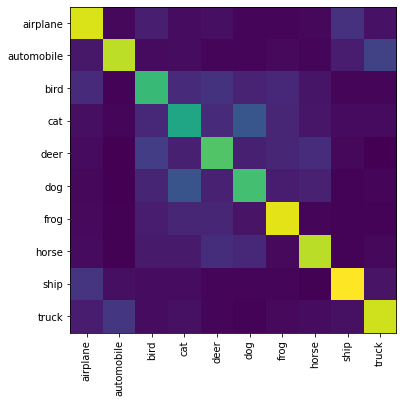

In [34]:
def conv2d(x, W, stride=2):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')
#for input x, the 4 parameters are batch size, image height, image width, image channels.
# for kernel W, they're height, width, in channel, out channel   W


class CNNClassifer(TFClassifier):
    def __init__(self, classes=10, n=16):
        self.sess = tf.Session()
        self.stride= 2
        self.x = tf.placeholder(tf.float32, shape=[None,32,32,3]) # input batch of images
        self.y_ = tf.placeholder(tf.int64, shape=[None]) # input labels
        
        # CNN model variables
        # weight
        self.W_conv1 = weight_variable([4,4,3,n])
        self.W_conv2 = weight_variable([4,4,n,2*n])
        self.W_conv3 = weight_variable([4,4,2*n ,4*n])
        self.W_out = weight_variable([4*4*4*n, classes])
        #biases
        self.bconv1 = bias_variable([n])
        self.bconv2 = bias_variable([2*n])
        self.bconv3 = bias_variable([4*n])
        self.Wb = bias_variable([classes])

        #  CNN  
        self.conv1 = tf.nn.relu(conv2d(self.x,self.W_conv1,self.stride) + self.bconv1)#output shape [50,16,16,16]
        self.conv2 = tf.nn.relu(conv2d(self.conv1,self.W_conv2,self.stride) + self.bconv2)#[50,8,8,32]
        self.conv3 = tf.nn.relu(conv2d(self.conv2,self.W_conv3,self.stride) + self.bconv3)#[50,4,4,64]
        self.y = tf.matmul(tf.reshape(self.conv3, shape=[-1,4*4*4*n]),self.W_out) + self.Wb
        
        
        


# test your CNN classifier (note you should get around 65% accuracy)
cnnClassifer = CNNClassifer()
cnnClassifer.train(trainData, trainLabels, epochs=300)

# display confusion matrix
M = confusion(testData, testLabels, cnnClassifer)
VisualizeConfussion(M)

#first test batchsize of 32, epoch of 300

## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****

-- I learned many basic syntax of tensorflow. What's more, I learned several ways to classify the trained images. They're linear classifier, multi layer perceptron and convolutional neutral network. I think the progress of TFClassifier is too difficult for me. I really take a long time to understand its process. I have understand the mathmatical process of these classifier, but I can't connect the math with the physical significance. I think I still need to spend a lot of time to read the pdf file you give me and the reference file on the internet.




## Further reference
To see how state of the art deep networks do on this dataset see: https://github.com/tensorflow/models/tree/master/research/resnet